Import Libraries

In [1]:
import numpy as np
import os
import cv2
import random
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
# Define the paths to the dataset
train_dir = r'Train'  # Change this to the correct path
test_dir = r'Test'    # Change this to the correct path

# Check if the paths exist
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory not found: {train_dir}")

if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Testing directory not found: {test_dir}")

print("Training directory contents:", os.listdir(train_dir))
print("Testing directory contents:", os.listdir(test_dir))

Training directory contents: ['Cat', 'Dog']
Testing directory contents: ['Cat', 'Dog']


Function to Load and Resize Images

In [4]:
def load_images_from_folder(folder, img_size=(64, 64), sample_size=100):
    images = []
    labels = []
    for label in ['cat', 'dog']:
        label_folder = os.path.join(folder, label)
        if not os.path.exists(label_folder):
            raise FileNotFoundError(f"Label folder not found: {label_folder}")
        label_class = 0 if label == 'cat' else 1
        filenames = random.sample(os.listdir(label_folder), sample_size)
        for filename in filenames:
            img = cv2.imread(os.path.join(label_folder, filename))
            if img is not None:
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(label_class)
    return images, labels

In [5]:
# Loading a subset of the training images and labels
train_images, train_labels = load_images_from_folder(train_dir, sample_size=50)

# Loading a subset of the testing images and labels
test_images, test_labels = load_images_from_folder(test_dir, sample_size=50)


In [6]:
# Converting the images and labels to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

Pixel Values Normalization

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Flattening Images for SVM

In [8]:
n_train_samples, height, width, n_channels = train_images.shape
train_images_flat = train_images.reshape(n_train_samples, height * width * n_channels)

n_test_samples = test_images.shape[0]
test_images_flat = test_images.reshape(n_test_samples, height * width * n_channels)

In [9]:
# Standardize the features
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)
test_images_scaled = scaler.transform(test_images_flat)

Training the SVM

In [10]:
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(train_images_scaled, train_labels)

SVC(kernel='linear', random_state=42)

In [11]:
# Make predictions on the test set
y_pred = svm_clf.predict(test_images_scaled)

Evaluating the Classifier

In [12]:
accuracy = accuracy_score(test_labels, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(test_labels, y_pred))

Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        50
           1       0.52      0.50      0.51        50

    accuracy                           0.52       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.52      0.52      0.52       100



Plotting Some Test Images with Predicted Labels

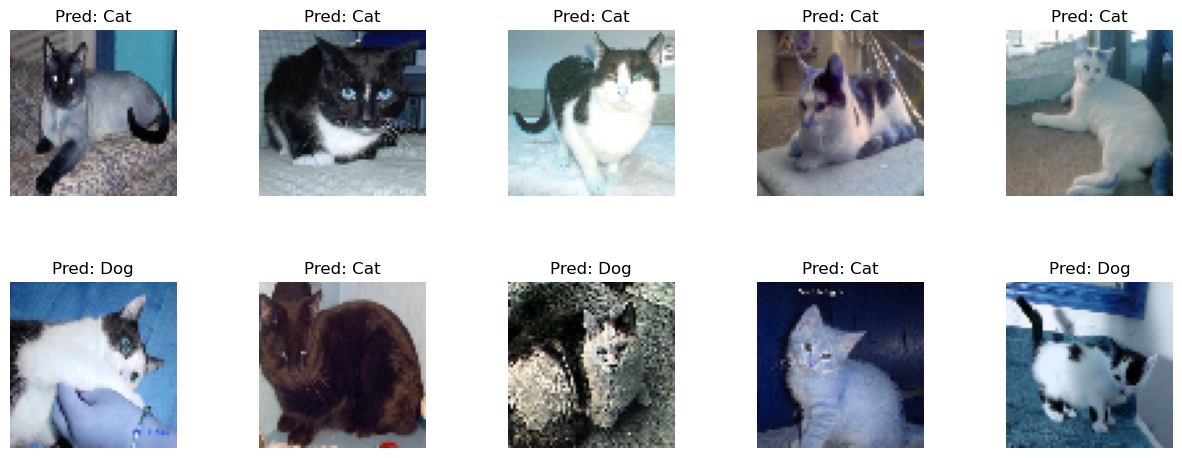

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in np.arange(0, 10):
    axes[i].imshow(test_images[i])
    axes[i].set_title(f'Pred: {"Dog" if y_pred[i] else "Cat"}')
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()